In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = yf.download(tickers='F', start='2000-01-01')[['Adj Close']].copy()

df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2000-01-03,14.884730
2000-01-04,14.387387
2000-01-05,14.440680
2000-01-06,14.458439
2000-01-07,15.524167
...,...
2022-08-03,15.690000
2022-08-04,15.370000
2022-08-05,15.300000


<AxesSubplot:xlabel='Date'>

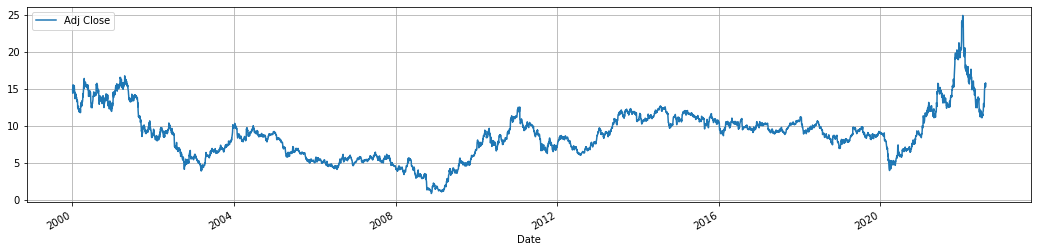

In [48]:
df.plot(figsize=(18,4), grid=True)

In [65]:
df['Fast'] = df['Adj Close'].rolling(window=42).mean()
df['Slow'] = df['Adj Close'].rolling(window=252).mean()


<AxesSubplot:xlabel='Date'>

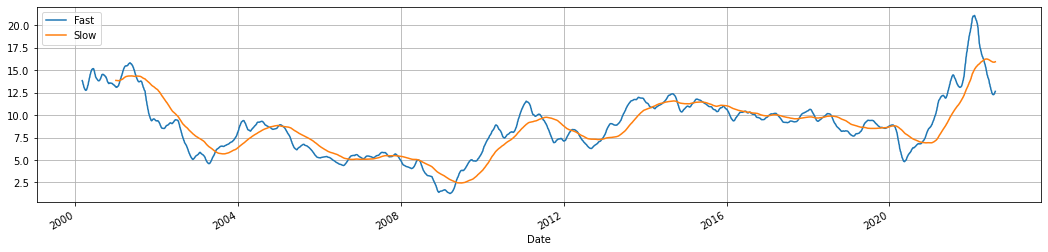

In [66]:
cols = ['Fast', 'Slow']

df[cols].plot(figsize=(18,4), grid=True)

<AxesSubplot:xlabel='Date'>

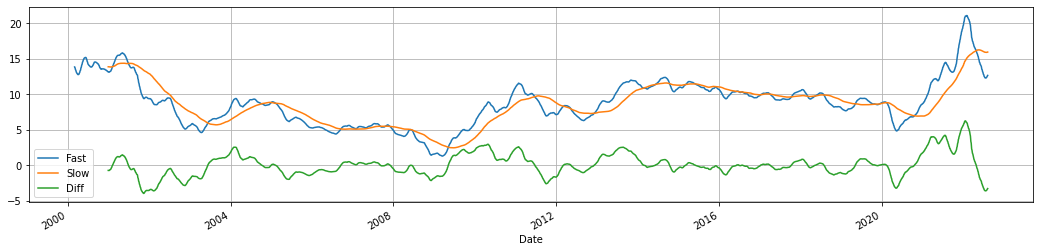

In [67]:
df['Diff'] = df['Fast'] - df['Slow']

cols = ['Fast', 'Slow', 'Diff']

df[cols].plot(figsize=(18,4), grid=True)

# Add Rules of the Trading Strategy

ratio =  Diff/Slow

- LONG - when ratio > threshhold
- SHORT when ratio  < -threshhold
- CASH when inbetween

In [68]:
LONG = 1
SHORT = -1
CASH = 0

lthresh = 0.01
uthresh = 0.1

df['Pos'] = np.where(df['Diff']/df['Slow'] > uthresh, LONG, CASH)
df['Pos'] = np.where(df['Diff']/df['Slow'] < -lthresh, SHORT, df['Pos'])

<AxesSubplot:xlabel='Date'>

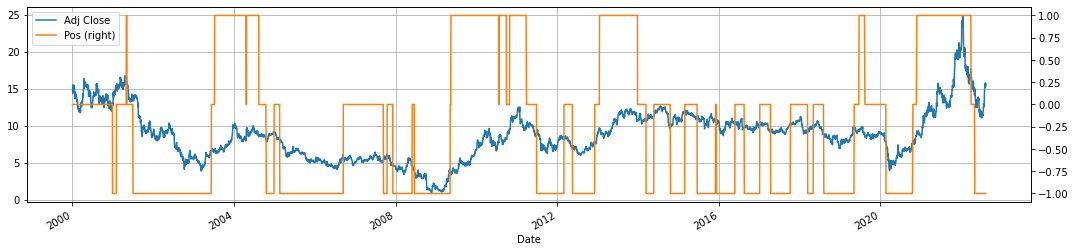

In [69]:
cols = ['Adj Close', 'Pos']
df[cols].plot(figsize=(18,4), grid=True, secondary_y='Pos')

In [70]:
df['Market'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['Strat'] = df['Pos'].shift(1) * df['Market']

<AxesSubplot:xlabel='Date'>

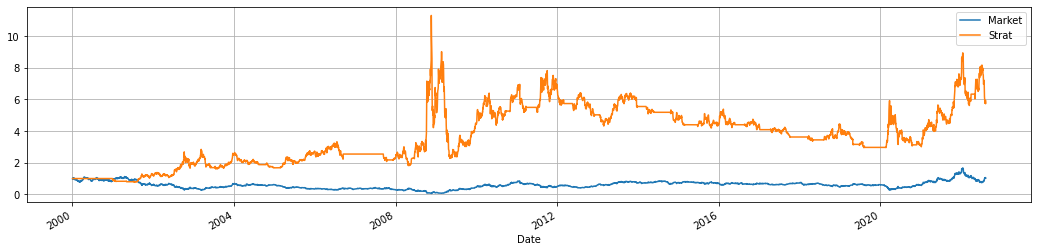

In [71]:
cols = ['Market', 'Strat']

df[cols].cumsum().apply(np.exp).plot(figsize=(18,4), grid=True)


In [72]:
mkt, strat = df[cols].cumsum().apply(np.exp).iloc[-1]

print(f'Market = {np.round(mkt, 2)}')
print(f'Strat = {np.round(strat, 2)}')
print(f'Strat/Market = {np.round(strat/mkt, 2)}')

Market = 1.03
Strat = 5.9
Strat/Market = 5.74
